# Data Analysis

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [42]:
data = pd.read_csv('../data_prep/hot_plus_random.csv')

In [43]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,success
0,0.565,0.547,0.0,-7.722,1.0,0.0347,0.5790,0.000000,0.194,0.252,75.018,audio_features,1MOqMyQ7CULmWWjovkFY5B,spotify:track:1MOqMyQ7CULmWWjovkFY5B,https://api.spotify.com/v1/tracks/1MOqMyQ7CULm...,https://api.spotify.com/v1/audio-analysis/1MOq...,209320.0,4.0,1.0
1,0.578,0.894,10.0,-5.420,1.0,0.0296,0.0103,0.000003,0.216,0.741,165.980,audio_features,2dwhMQsFeHr2S787WxqAqW,spotify:track:2dwhMQsFeHr2S787WxqAqW,https://api.spotify.com/v1/tracks/2dwhMQsFeHr2...,https://api.spotify.com/v1/audio-analysis/2dwh...,347107.0,4.0,1.0
2,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.251,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,spotify:track:3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547.0,4.0,1.0
3,0.488,0.923,2.0,-3.697,1.0,0.1030,0.1290,0.000000,0.158,0.818,183.891,audio_features,296XGtH5MeGisqD3uAz6Q6,spotify:track:296XGtH5MeGisqD3uAz6Q6,https://api.spotify.com/v1/tracks/296XGtH5MeGi...,https://api.spotify.com/v1/audio-analysis/296X...,202253.0,4.0,1.0
4,0.753,0.450,9.0,-6.909,1.0,0.0924,0.2740,0.000002,0.321,0.560,109.405,audio_features,6kD36kVRn5leDDbjXpHQY0,spotify:track:6kD36kVRn5leDDbjXpHQY0,https://api.spotify.com/v1/tracks/6kD36kVRn5le...,https://api.spotify.com/v1/audio-analysis/6kD3...,288933.0,4.0,1.0


In [44]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'success'],
      dtype='object')


In [45]:
# y includes our labels (Y or N) and x includes our features
y = data.success
# drop text columns
list = ['type','id','uri', 'track_href', 'analysis_url', 'success']
x = data.drop(list,axis = 1 )
x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.565,0.547,0.0,-7.722,1.0,0.0347,0.5790,0.000000,0.194,0.252,75.018,209320.0,4.0
1,0.578,0.894,10.0,-5.420,1.0,0.0296,0.0103,0.000003,0.216,0.741,165.980,347107.0,4.0
2,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.251,0.278,136.859,250547.0,4.0
3,0.488,0.923,2.0,-3.697,1.0,0.1030,0.1290,0.000000,0.158,0.818,183.891,202253.0,4.0
4,0.753,0.450,9.0,-6.909,1.0,0.0924,0.2740,0.000002,0.321,0.560,109.405,288933.0,4.0


Number of succesful songs:  7857
Number of not succesful songs :  7857


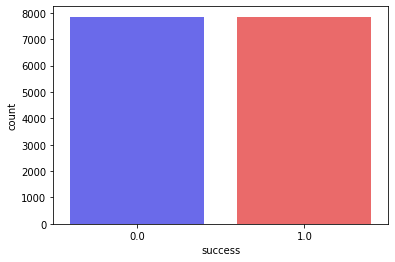

In [18]:
ax = sns.countplot(y, label="Count", palette='seismic')       # Y = 7857, N = 7857
Y, N = y.value_counts()
print('Number of succesful songs: ', Y)
print('Number of not succesful songs : ', N)

In [13]:
x.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,15714.000000,15714.000000,15714.00000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,1.571400e+04,15714.000000
mean,0.599414,0.552151,5.23635,-10.371038,0.664948,0.261971,0.344270,0.112481,0.225027,0.483976,117.232379,2.176059e+05,3.822197
std,0.175795,0.261042,3.56016,6.866812,0.472024,0.341849,0.331036,0.281398,0.190886,0.242454,31.655250,1.332975e+05,0.689274
min,0.000000,0.000000,0.00000,-47.395000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.253000e+03,0.000000
25%,0.501000,0.329000,2.00000,-14.563500,0.000000,0.039000,0.040200,0.000000,0.103000,0.299000,93.536250,1.625560e+05,4.000000
50%,0.632000,0.590000,5.00000,-7.626000,1.000000,0.068600,0.231000,0.000000,0.147000,0.484000,116.465000,2.110000e+05,4.000000
75%,0.717000,0.772000,8.00000,-5.294000,1.000000,0.317000,0.615000,0.000381,0.293000,0.669000,137.138250,2.497578e+05,4.000000
max,0.986000,1.000000,11.00000,0.175000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,247.994000,4.354000e+06,5.000000


### Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

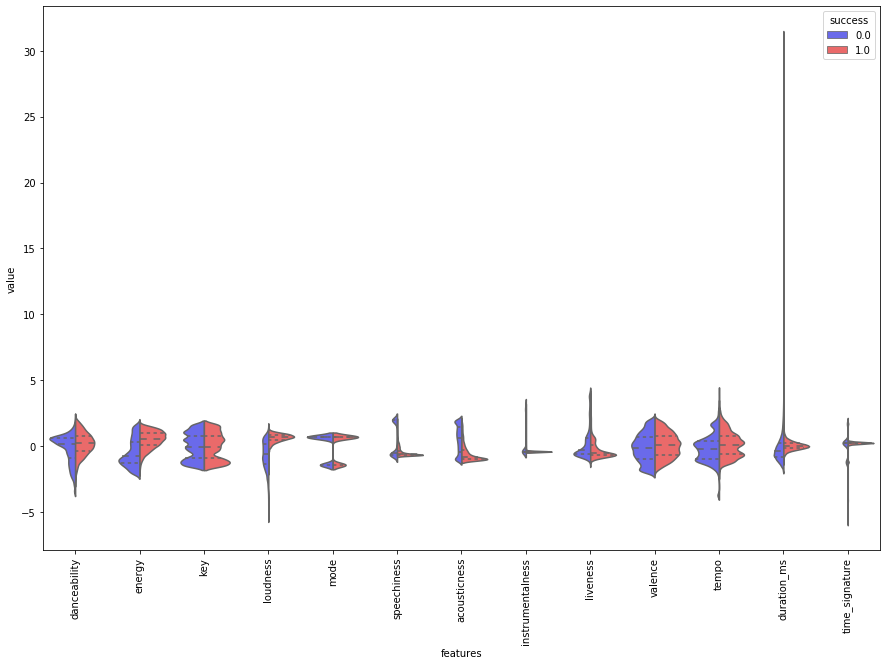

In [17]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:13]],axis=1)
data = pd.melt(data,id_vars="success",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="success", data=data,split=True, inner="quart", palette='seismic')
plt.xticks(rotation=90);

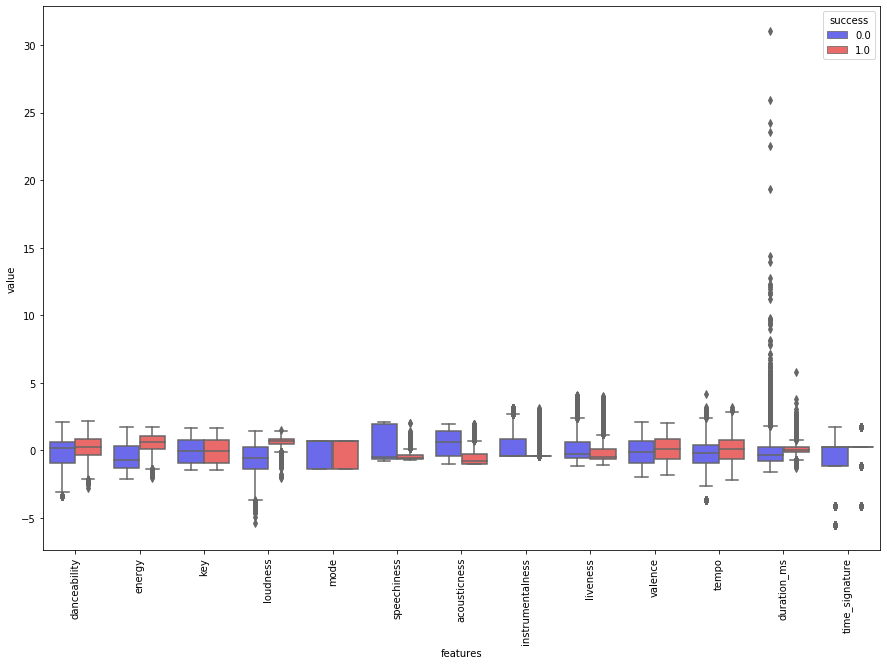

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="success", data=data, palette='seismic')
plt.xticks(rotation=90);

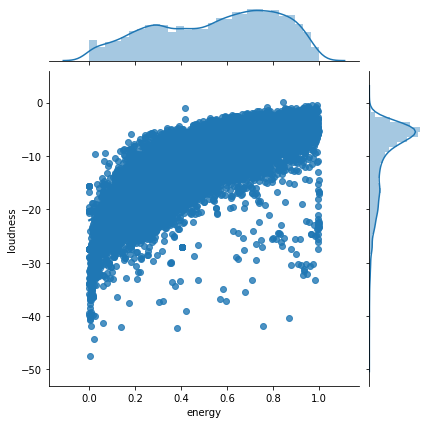

In [22]:
sns.jointplot(x.loc[:,'energy'], x.loc[:,'loudness'], kind="regg");

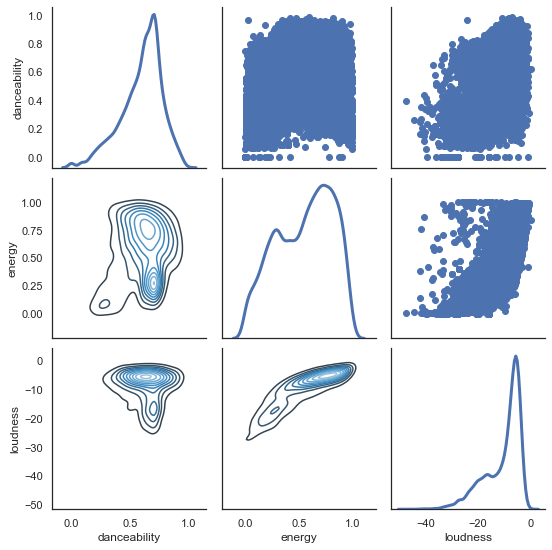

In [23]:
sns.set(style="white")
df = x.loc[:,['danceability','energy','loudness']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

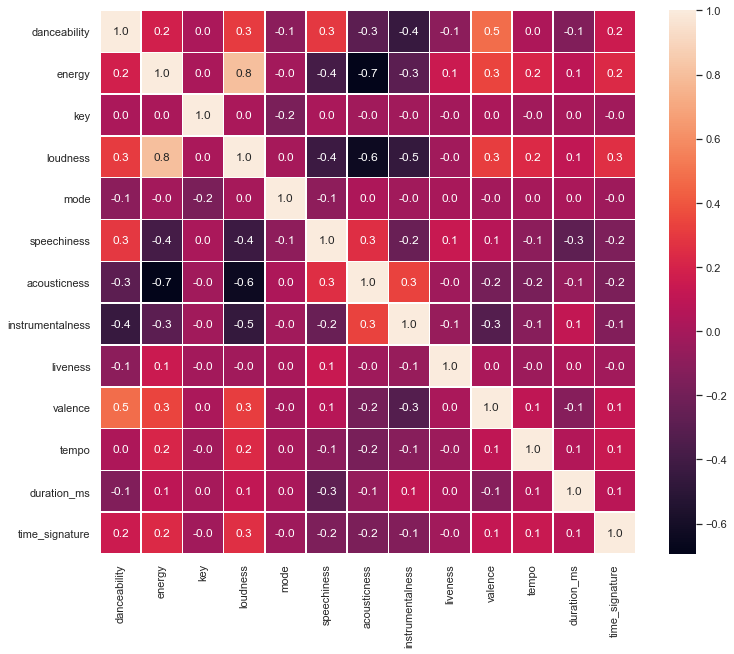

In [31]:
#correlation map
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

I see that 'energy' and 'loudness' are correlated with ratio 0.8. Let's try the accuracy with and without 'loudness'

In [34]:
x_1 = x.drop('loudness',axis = 1 )        # do not modify x, we will use it later 

# Feature Selection and Random Forest Classification

### 1) Feature Selection and Random Forest Classification

Accuracy is:  0.905408271474019


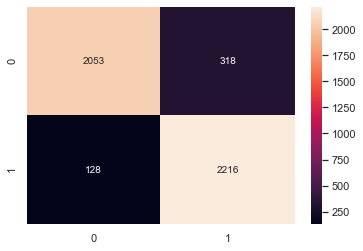

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

Accuracy is:  0.8981972428419936


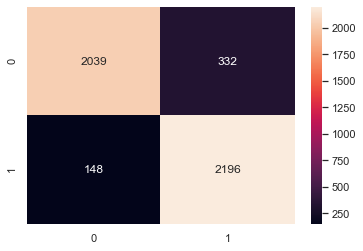

In [35]:
#Without 'loudness'

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

Accuracy gets lower without 'loudness' so let's keep that feature.

### 2) Univariate feature selection and random forest classification

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

ValueError: Input X must be non-negative.

In [50]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.54224715e+01 3.43979812e+02 1.07514510e+00 1.96923480e-01
 9.43771352e+02 9.59064947e+02 1.05074573e+03 8.43341465e+01
 1.25915998e+01 2.38965205e+03 5.35285758e+06 6.13190498e+01]
Feature list: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


### 3) Recursive feature elimination (RFE) with random forest

In [53]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [54]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms'], dtype='object')


Accuracy is:  0.8812301166489925


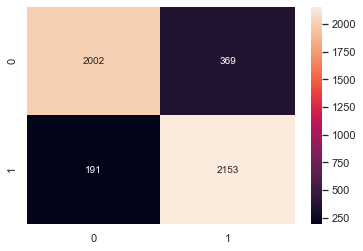

In [66]:
x_train_3 = x_train[['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms']]
x_test_3 = x_test[['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms']]
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(x_train_3,y_train)
ac_3 = accuracy_score(y_test,clf_rf_3.predict(x_test_3))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(y_test,clf_rf_3.predict(x_test_3))
sns.heatmap(cm_3,annot=True,fmt="d");

Accuracy drops to 0.8812 with only those 5 selected features.

### 4) Recursive feature elimination with cross validation and random forest classification

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [68]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


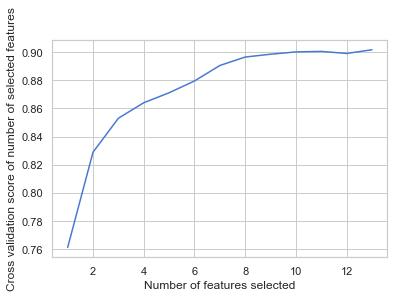

In [69]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then last make our last feature selection method.

### 5) Tree based feature selection and random forest classification

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a **featureimportances** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**

Feature ranking:
1. feature 3 (0.208772)
2. feature 1 (0.137192)
3. feature 11 (0.112629)
4. feature 5 (0.102548)
5. feature 7 (0.102357)
6. feature 6 (0.101372)
7. feature 8 (0.068532)
8. feature 9 (0.048807)
9. feature 0 (0.047296)
10. feature 10 (0.031236)
11. feature 12 (0.017520)
12. feature 2 (0.016748)
13. feature 4 (0.004991)


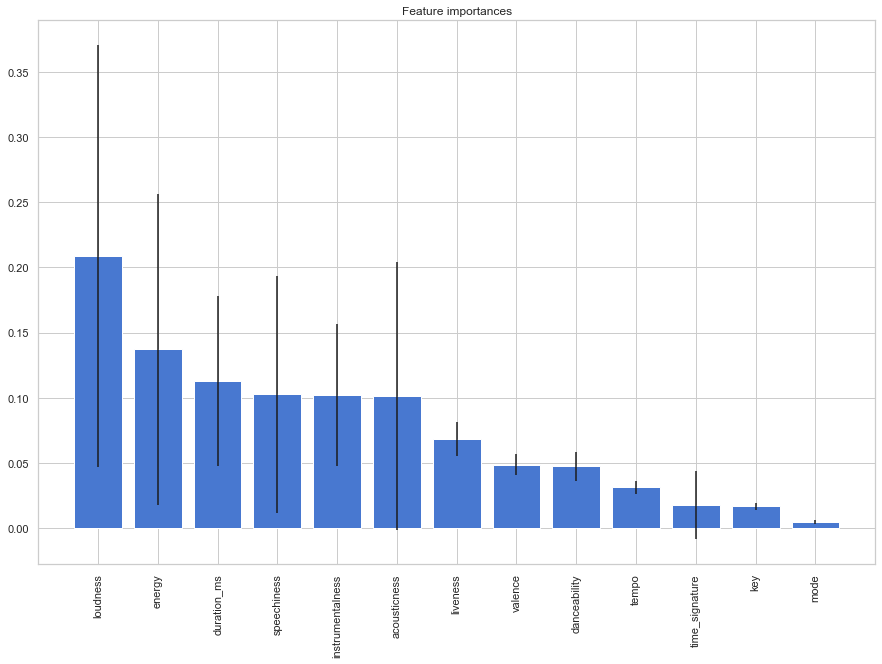

In [73]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show();

### Feature Extraction

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

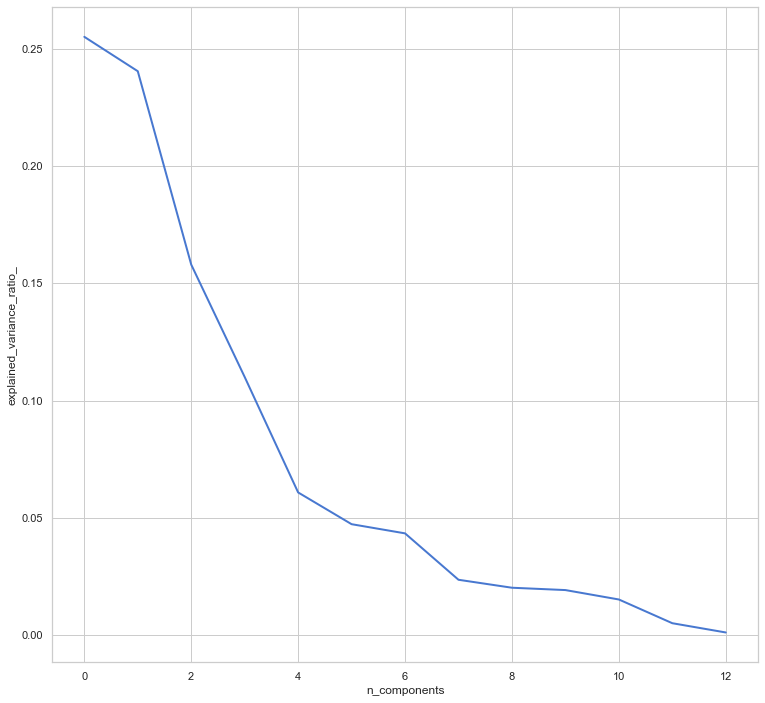

In [74]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to variance ration, 4 component can be chosen. (Maybe 1? or 6?)